# Classic Models

- Naïve Bayes
- Logistic Regression
-  SVM

In [2]:
import pandas as pd
X_train = pd.read_csv('../data/processed/splits transformed/X_train_clean.csv', quoting= 1)
X_test = pd.read_csv('../data/processed//splits transformed/X_test_clean.csv', quoting=1)

y_train = pd.read_csv('../data/processed//splits/y_train.csv')
y_test = pd.read_csv('../data/processed//splits/y_test.csv')

In [3]:
y_train.shape

(35918, 1)

In [4]:
X_train.shape

(35918, 1)

In [5]:
# we choose tf-idf as the text embedding method
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(max_df=0.7)
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train['transformed_text_title_combined'])
X_tfidf_test = tfidf_vectorizer.transform(X_test['transformed_text_title_combined'])

In [6]:
print(X_tfidf_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5675429 stored elements and shape (35918, 87232)>
  Coords	Values
  (0, 83038)	0.07813607802855041
  (0, 64312)	0.05880149864296185
  (0, 83878)	0.24665141446633027
  (0, 34187)	0.22927430017491146
  (0, 76501)	0.09700243134705672
  (0, 39266)	0.11631554407621744
  (0, 18640)	0.1027808491290854
  (0, 37177)	0.11372780376697138
  (0, 33275)	0.09367560385278573
  (0, 13633)	0.283448765860621
  (0, 22719)	0.2549698507539991
  (0, 80887)	0.10418762798263989
  (0, 21180)	0.3530744717228296
  (0, 24933)	0.20259954145086442
  (0, 27470)	0.11404444302165168
  (0, 58539)	0.08756450652531254
  (0, 36906)	0.1709181730015565
  (0, 65923)	0.11484917256871074
  (0, 42653)	0.08766053775214716
  (0, 56055)	0.2663667212682484
  (0, 72022)	0.11348246268449293
  (0, 38952)	0.18932525072206138
  (0, 21805)	0.20245261320990626
  (0, 77077)	0.07118711954424353
  (0, 63778)	0.10441910692826506
  :	:
  (35917, 34217)	0.027192175261880825
  (35917, 

In [7]:
y_test.shape

(8980, 1)

In [8]:
X_test.shape

(8980, 1)

In [9]:
X_tfidf_test.shape

(8980, 87232)

In [10]:
X_tfidf_train.shape

(35918, 87232)

In [11]:
y_train.shape

(35918, 1)

#### Choosing the Best Base Model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Linear SVC': LinearSVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
}

results = []

for name, model in models.items():
    model.fit(X_tfidf_train, y_train)
    y_pred = model.predict(X_tfidf_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, "Accuracy": acc})
    print(f'{name}:', classification_report(y_test, y_pred))

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print('Model Comparison')
print(results_df)

c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear SVC:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Multinomial Naive Bayes:               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4696
           1       0.94      0.92      0.93      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Model Comparison
                     Model  Accuracy
1               Linear SVC  0.996214
0      Logistic Regression  0.987751
2  Multinomial Naive Bayes  0.936971


c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


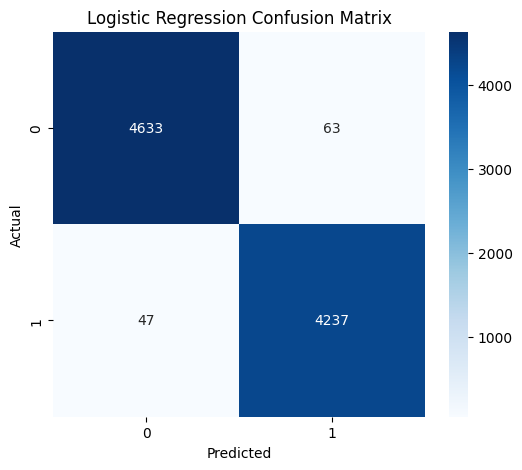

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = LogisticRegression(max_iter=200)
model.fit(X_tfidf_train, y_train)
y_pred = model.predict(X_tfidf_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('../reports/figures/LogisticRegression_confusion_matrix.png', dpi=300)
plt.show()
plt.close()

#### Applying GridSearch on our Base Model

In [ ]:
# cross validation on best model:  Linear SVC
# hyper-parameter tunning
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'],
    'class_weight': [None, 'balanced'],
}

svc = LinearSVC(max_iter=5000)

grid_search = GridSearchCV(estimator=svc,
                            param_grid=param_grid,
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1, 
                            verbose=2)

In [ ]:
grid_search.fit(X_tfidf_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accur0acy:", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sheha\Desktop\Fake News & Sentiment Detection System\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best Parameters: {'C': 100, 'class_weight': None, 'loss': 'squared_hinge', 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.9961857634038795


In [ ]:
best_model = grid_search.best_estimator_
test_acc = best_model.score(X_tfidf_test, y_test)
print("Test Accuracy with best params:", test_acc)

Test Accuracy with best params: 0.9969933184855234


In [ ]:
# Saving best model
import joblib

joblib.dump(best_model, "../models/LinearSVC.pkl")

['../models/LinearSVC.pkl']